# Explanatory Data Analysis Menggunakan Dataset Titanic

Deskripsi data:
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S =  Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)


# Import paket yang dibutuhkan 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Panggil data yang akan dieksplorasi

In [85]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Bangalore/train.csv")
data.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000,1,1,11751,52.554,D35,S
460,461,1,1,"Anderson, Mr. Harry",male,48.000,0,0,19952,26.550,E12,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,nan,0,0,334912,7.733,NaN,Q
471,472,0,3,"Cacic, Mr. Luka",male,38.000,0,0,315089,8.662,NaN,S
236,237,0,2,"Hold, Mr. Stephen",male,44.000,1,0,26707,26.000,NaN,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000,1,0,13502,77.958,D7,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.000,0,0,SOTON/OQ 392089,8.050,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.000,0,0,1601,56.496,NaN,S


In [86]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Deskripsi variabel-variabel yang terdapat pada data

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:   Survived	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 19.87%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.00%
column:      Cabin	 percent of NaN value: 77.10%
column:   Embarked	 percent of NaN value: 0.22%


Terdapat data yang hilang/missing pada variabel 'Age', 'Cabin', dan 'Embarked' dengan persentase sebesar 19.87%, 77.10%, dan 0.22%. Hal ini juga dapat terlihat pada data.info() dimana jumlah total data yang terisi tidak terisi secara keseluruhan.

## Pisahkan antara data kategorik dan numerik

In [89]:
cat = ["Name","Sex","Ticket","Cabin","Embarked"] #string value
num = ["PassengerId","Age","Fare"]
# "Survived","Pclass","SibSp", "Parch" ini adalah data kategorik dengan int value

## Deskripsi data kategorik

In [90]:
data[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Trout, Mrs. William H (Jessie L)",male,347082,G6,S
freq,1,577,7,4,644


In [91]:
data.Sex.value_counts()
data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
248706      1
111427      1
3101276     1
324669      1
113783      1
Name: Ticket, Length: 681, dtype: int64

# Insight

1. jenis kelamin penumpang mayoritas pria
2. ticket kemungkinan mengalami duplikat karena ada ticket dengan kuantitas 7
3. mayoritas penumpang berangkat pada pelabuhan SOUTHAMPTON


## Deskripsi Data Numerik

In [92]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('red', as_cmap=True))

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


Data kategorik yang memiliki berbentuk integer 


In [93]:
print(data.Survived.value_counts())
print(data.Pclass.value_counts())
print(data.SibSp.value_counts())
print(data.Parch.value_counts())



0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


# Insight
*   penumpang mayoritas tidak selamat
*   membeli tiket kebanyakan level 3 (low)
* berumur 29 tahun yang artinya penumpang rata-rata dewasa muda
* rata-rata penumpang kapal adalah sendirian
* dan mereka tidak memiliki anak/ orang tua ketika berada dikapal
* tarif penumpang rata-rata $32/ penumpang
* dan variable yang kemungkinan skew adalah Fare, tetapi kita perlu cek nilai skew agar mendapatkan nilai yang cocok dalam mengisi nilai yang hilang


In [94]:
for col in cat: #berikut adalah searan nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Name:
Trout, Mrs. William H (Jessie L)                   1
Gheorgheff, Mr. Stanio                             1
O'Driscoll, Miss. Bridget                          1
Smith, Miss. Marion Elsie                          1
Silven, Miss. Lyyli Karoliina                      1
                                                  ..
Sobey, Mr. Samuel James Hayden                     1
Meyer, Mr. Edgar Joseph                            1
Coleff, Mr. Satio                                  1
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)    1
Ekstrom, Mr. Johan                                 1
Name: Name, Length: 891, dtype: int64

Value count kolom Sex:
male      577
female    314
Name: Sex, dtype: int64

Value count kolom Ticket:
347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
248706      1
111427      1
3101276     1
324669      1
113783      1
Name: Ticket, Length: 681, dtype: int64

Value count kolom Cabin:
G6             4
C23 C25 C27    

In [95]:
num = ["PassengerId","Age","Fare", "Survived","Pclass","SibSp", "Parch"]
# 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

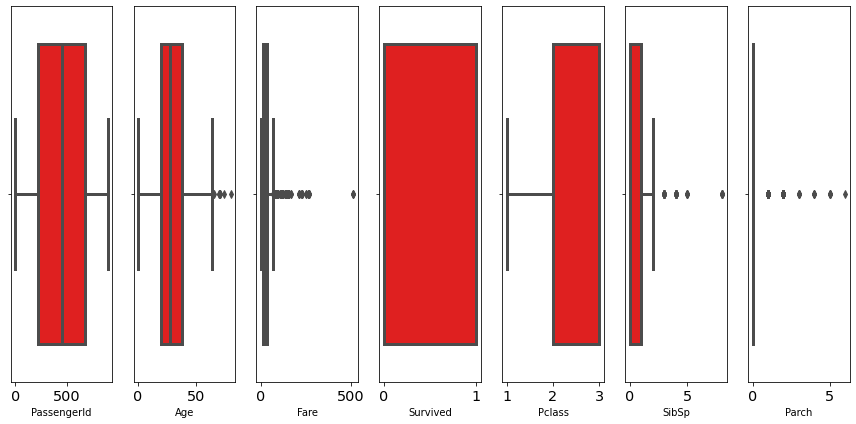

In [96]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='red', orient='v')
    plt.tight_layout()

* variable age, fare skew positif dan masing-masing variable terdapat outlier sehingga perlu dihapus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

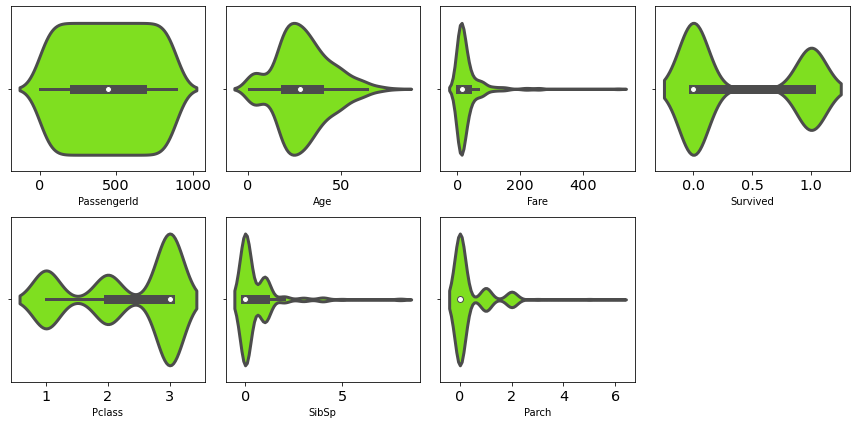

In [97]:
#violin plot : alternatif jika kesulitan membaca distribusi data
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.violinplot(data[num[i]], color='chartreuse', orient='v')
    plt.tight_layout()

* terlihat pada kolom survived mayoritas tidak selamat (0)
* mayoritas penumpang berada dikelas low (3)
* mayoritas distribusi umur berada pada angka 20-40th skew positif
* mayoritas penumpang lajang sampai berpasangan (0 s/d 1)
* dan tidak memilki anak atau orang tua yang berada dikapal 
* range biaya antara $0-20/ penumpang

In [98]:
#menghapus kolom yang banyak unique nya
data.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


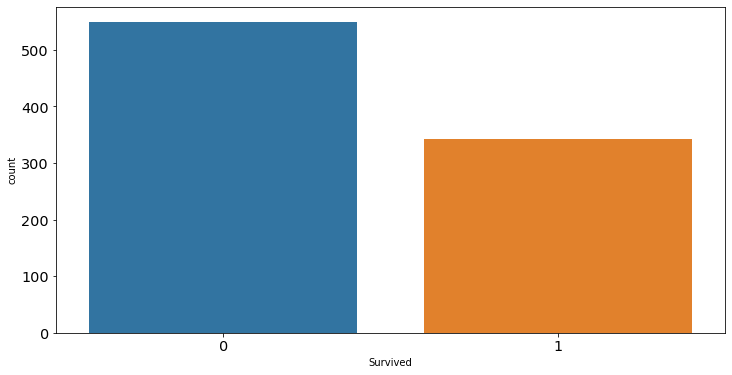

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


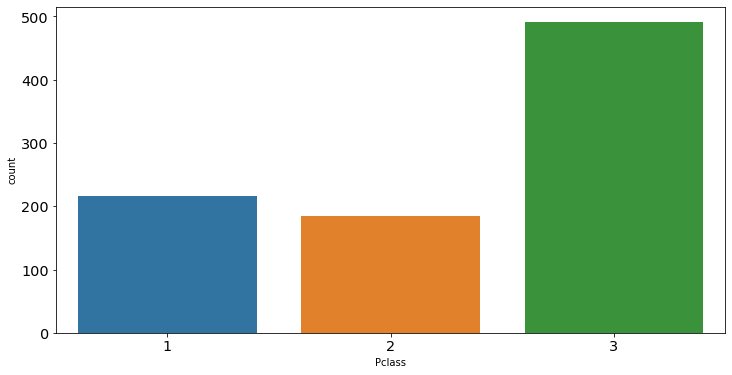

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


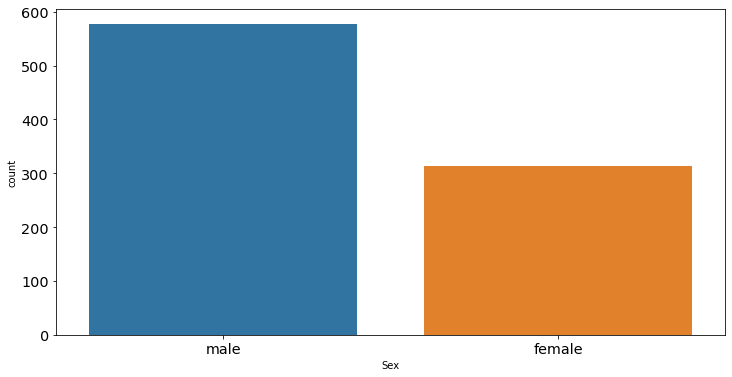

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


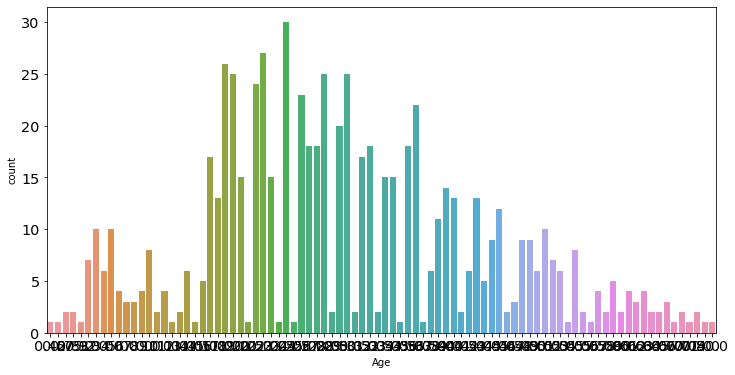

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


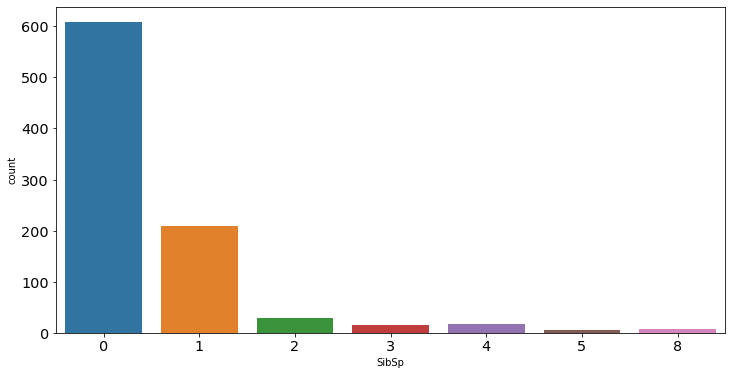

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


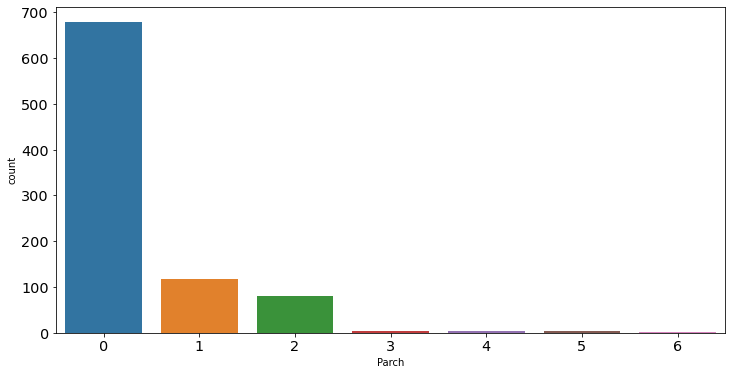

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


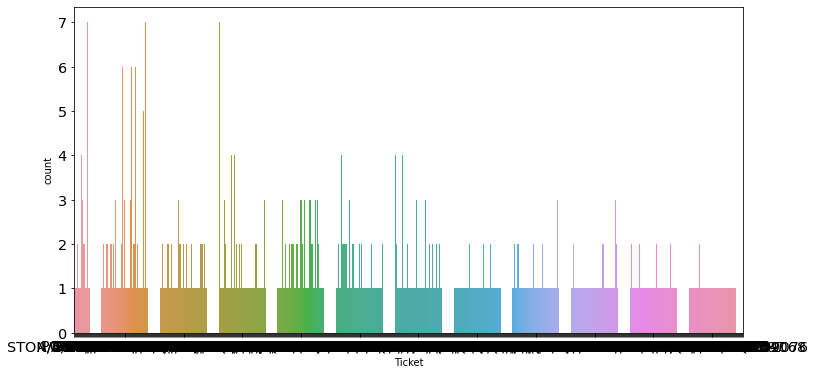

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


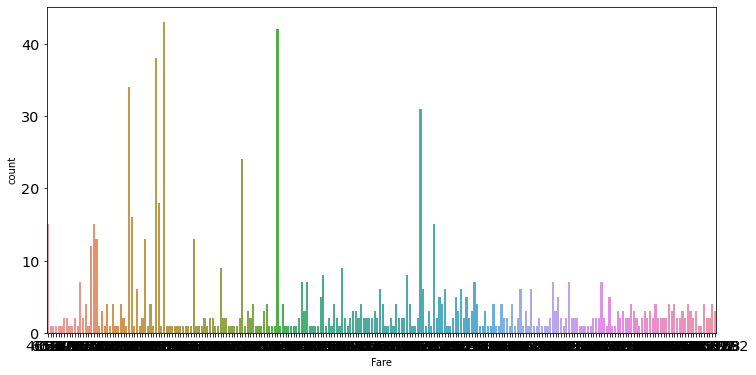

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


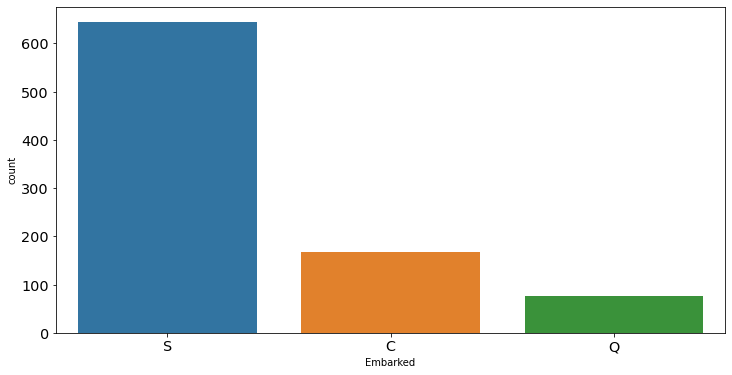

In [99]:
for i in data.columns: #visualisasi univariate
    sns.countplot(data[i])
    plt.show()


# validasi :

* penumpang tidak selamat lebih banyak dari yang selamat
* penumpang kelas 3 mayoritas dikapal titanic
* penumpang berjenis kelamin pria > perempuan
* mayoritas penumpang lajang dibuktikan dengan kolom sibsp dan parch dengan angka 0
* penumpang mayoritas berangkat dari pelabuhan southampton

# MISSING DATA AND HANDLE IT

In [100]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

terdapat kolom yang kosong yaitu age yang dihandle dengan rata-rata nilai age dan kolom embarked diisi dengan modus (S)

In [101]:
#IMPUTASI DATA CATEGORICAL
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
#imputasi data numerikal
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [102]:
data.isna().sum() #sudah tidak ada data kosong

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [103]:
print(data.duplicated().sum()) #cek duplikated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) #data sudah tidak ada data duplikated

15
0


In [104]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Age','Fare']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 876
Jumlah baris setelah memfilter outlier: 711


In [105]:
pd.set_option("display.float", "{:.4f}".format)
data1.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

,Skewness
Pclass,-1.1072
Age,0.0163
Survived,0.7086
Fare,1.5126
SibSp,2.9364
Parch,3.3665



terlihat yang memiliki skew cukup besar adalah parch, sibsp, fare, dan pclass sehingga perlu dilakukan normalization

In [106]:
#normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE

data1['Pclass_norm'] = MinMaxScaler().fit_transform(data1['Pclass'].values.reshape(len(data1), 1))
data1['Fare_norm'] = MinMaxScaler().fit_transform(data1['Fare'].values.reshape(len(data1), 1))
data1['SibSp_norm'] = MinMaxScaler().fit_transform(data1['SibSp'].values.reshape(len(data1), 1))
data1['Parch_norm'] = MinMaxScaler().fit_transform(data1['Parch'].values.reshape(len(data1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Cek normalitas

In [107]:
pd.set_option("display.float", "{:.3f}".format)
data1.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

,Skewness
Pclass,-1.107
Pclass_norm,-1.107
Age,0.016
Survived,0.709
Fare_norm,1.513
Fare,1.513
SibSp_norm,2.936
SibSp,2.936
Parch_norm,3.366
Parch,3.366


In [108]:
data1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
886,0,2,male,27.000,0,0,211536,13.000,S,0.500,0.205,0.000,0.000
887,1,1,female,19.000,0,0,112053,30.000,S,0.000,0.473,0.000,0.000
888,0,3,female,29.699,1,2,W./C. 6607,23.450,S,1.000,0.370,0.200,0.333
889,1,1,male,26.000,0,0,111369,30.000,C,0.000,0.473,0.000,0.000
890,0,3,male,32.000,0,0,370376,7.750,Q,1.000,0.122,0.000,0.000


In [109]:
#perlu hapus variable yang sebelum dinormalization
data1.drop(['Pclass','SibSp','Parch','Fare'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


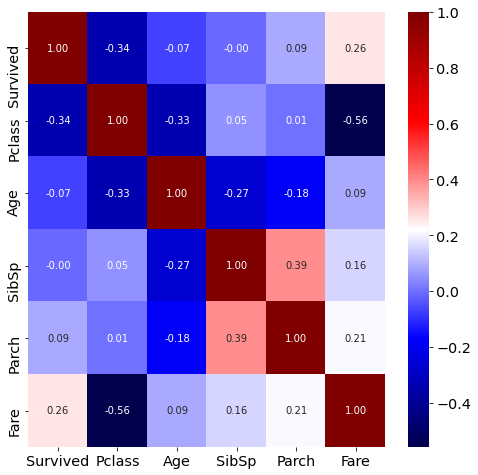

In [110]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='seismic', annot=True, fmt='.2f')
#terlihat pclass dengan fare kemungkinan multikolinearitas dan 
#masih banyak nilai korelasi yang kecil terhadap label sehingga perlu modifikasi variable lagi

<Figure size 1080x1080 with 0 Axes>

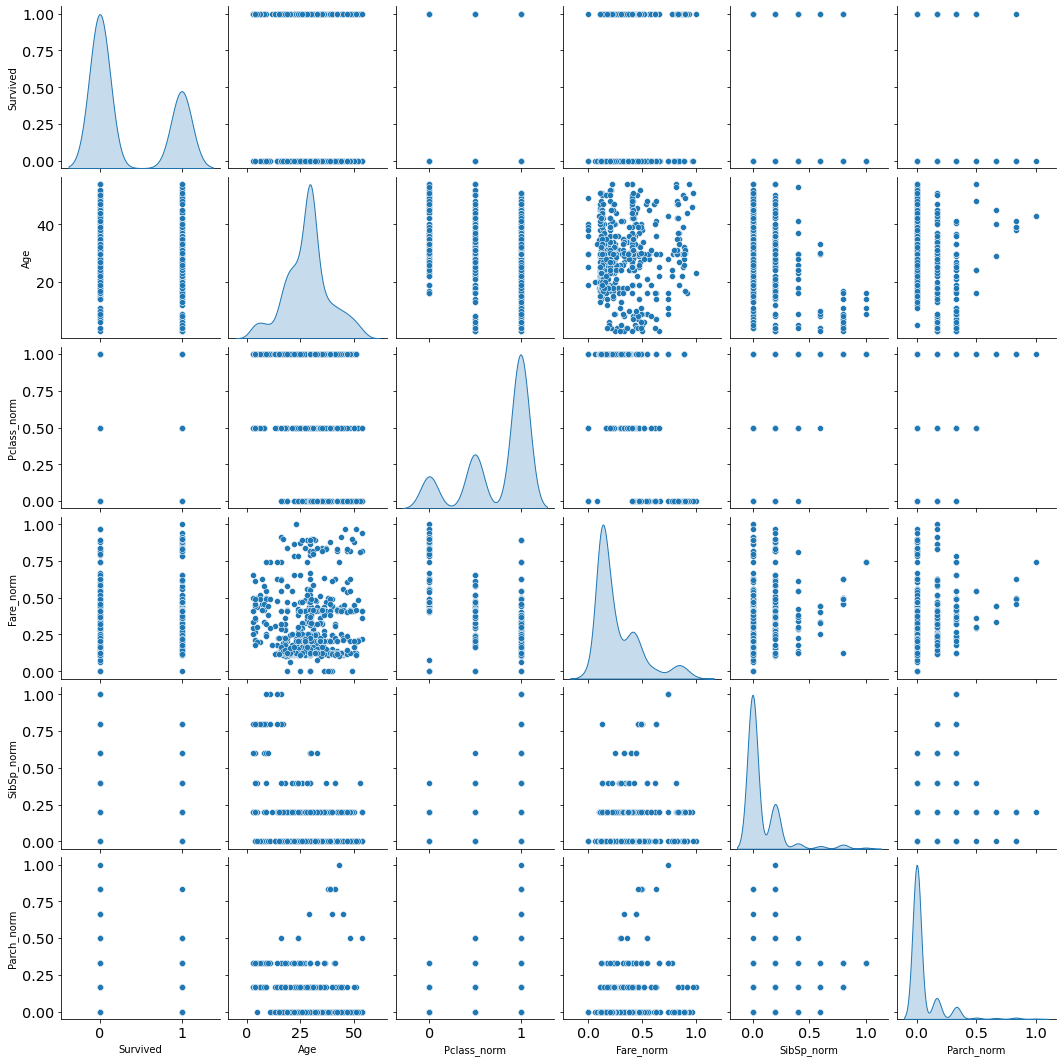

In [111]:
plt.figure(figsize=(15, 15))
sns.pairplot(data1, diag_kind='kde')

In [112]:
del data1['Ticket'] #hapus ticket karena terlalu banyak nilai unique

In [113]:
data2 = pd.get_dummies(data1)
data2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000,1.000,0.114,0.200,0.000,0,1,0,0,1
2,1,26.000,1.000,0.125,0.000,0.000,1,0,0,0,1
3,1,35.000,0.000,0.838,0.200,0.000,1,0,0,0,1
4,0,35.000,1.000,0.127,0.000,0.000,0,1,0,0,1
5,0,29.699,1.000,0.133,0.000,0.000,0,1,0,1,0


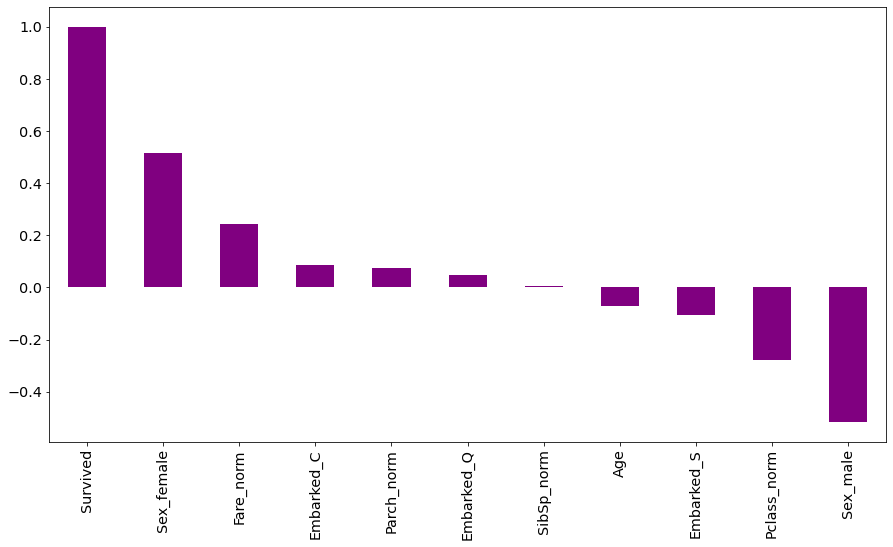

In [114]:
#BIVARIATE ANALYSIS
#cek korelasi antar feature
plt.figure(figsize=(15,8))
data2.corr()['Survived'].sort_values(ascending = False).plot(kind='bar', color='purple')
#terlihat variable female, male yang memiliki korelasi cukup tinggi (tetapi kurang! variablenya sehingga perlu modifikasi)

Text(0.5, 1.0, 'PROPORSI survived (%)')

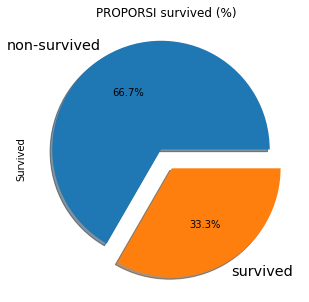

In [115]:
#EDA VISUALIZATION
labels = 'non-survived','survived'
data2['Survived'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI survived (%)") #data imbalance perlu tindakan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

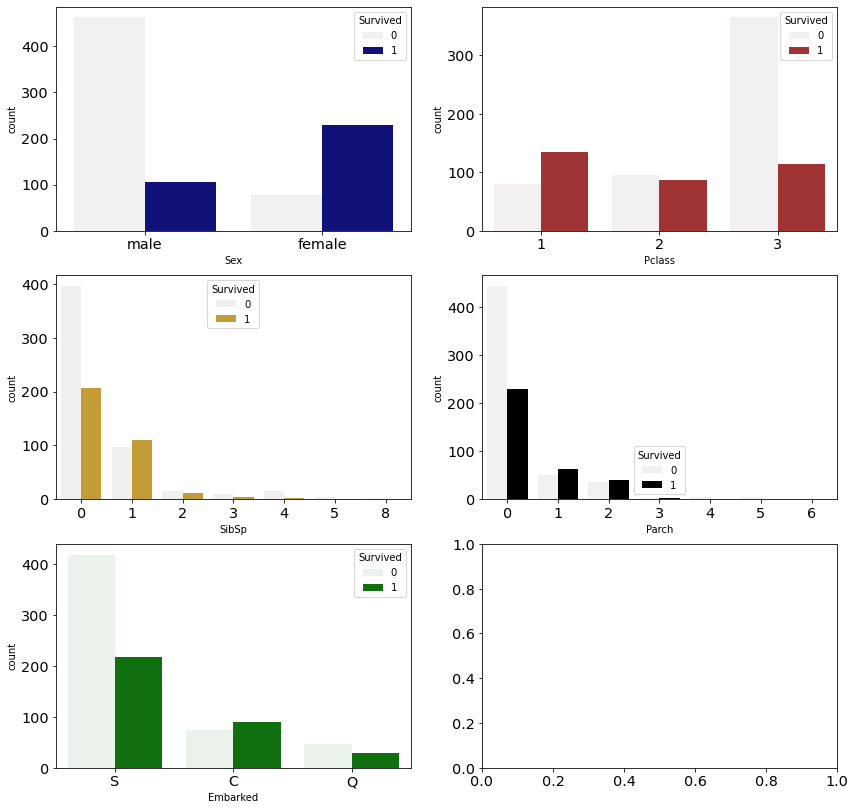

In [116]:
fig, ax =plt.subplots(nrows=3,ncols=2,figsize=(14,14))
sns.countplot('Sex',hue='Survived',data=data,color='darkblue',ax=ax[0,0])
sns.countplot('Pclass',hue='Survived',data=data,color='firebrick',ax=ax[0,1])
sns.countplot('SibSp',hue='Survived',data=data,color='goldenrod',ax=ax[1,0])
sns.countplot('Parch',hue='Survived',data=data,color='black',ax=ax[1,1])
sns.countplot('Embarked',hue='Survived',data=data,color='green',ax=ax[2,0])
plt.show()

# Insight
* penumpang selamat mayoritas perempuan
* dan yang selamat mayoritas berada dikelas 1 (high class)
* penumpang yang memiliki 1 pasangan atau satu saudara kandung dan satu anak kandung/ orang tua banyak yang selamat
* banyak yang selamat berangkat dari pelabuhan Cherbourg (C)

In [117]:
#lets create age category
data2['kategori_umur'] = pd.cut(data2['Age'].astype(int), bins=[-1,11,18,22,27,33,40,66,100],
                                    labels=[1,2,3,4,5,6,7,8]).to_frame()
    
#create a new column for the total number of family (Passenger )
data2['jumlah_keluarga'] = data2['Parch_norm']+ data2['SibSp_norm']+ 1 
data2['jumlah_keluarga'] = data2['jumlah_keluarga'].astype(int)
    
    # Age times Class
data2['age_class'] = data2['kategori_umur'] * data2['Pclass_norm']
data2['age_class'] = data2['age_class'].astype(int) 
    
    # Fare per Person
data2['biaya_per_orang'] = data2['Fare_norm']/(data2['jumlah_keluarga'])
data2['biaya_per_orang'] = data2['biaya_per_orang'].astype(float)  
    
    # Is alone
data2['is_alone'] = 0
data2.loc[data2['jumlah_keluarga'] == 1, 'is_alone'] = 1
    
    #convert pclass, sibsp and parch columns to int
data2[['Pclass_norm','SibSp_norm','Parch_norm']] = data2[['Pclass_norm','SibSp_norm','Parch_norm']].astype(int)

In [118]:
data2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,0,22.000,1,0.114,0,0,0,1,0,0,1,3,1,3,0.114,1
2,1,26.000,1,0.125,0,0,1,0,0,0,1,4,1,4,0.125,1
3,1,35.000,0,0.838,0,0,1,0,0,0,1,6,1,0,0.838,1
4,0,35.000,1,0.127,0,0,0,1,0,0,1,6,1,6,0.127,1
5,0,29.699,1,0.133,0,0,0,1,0,1,0,5,1,5,0.133,1


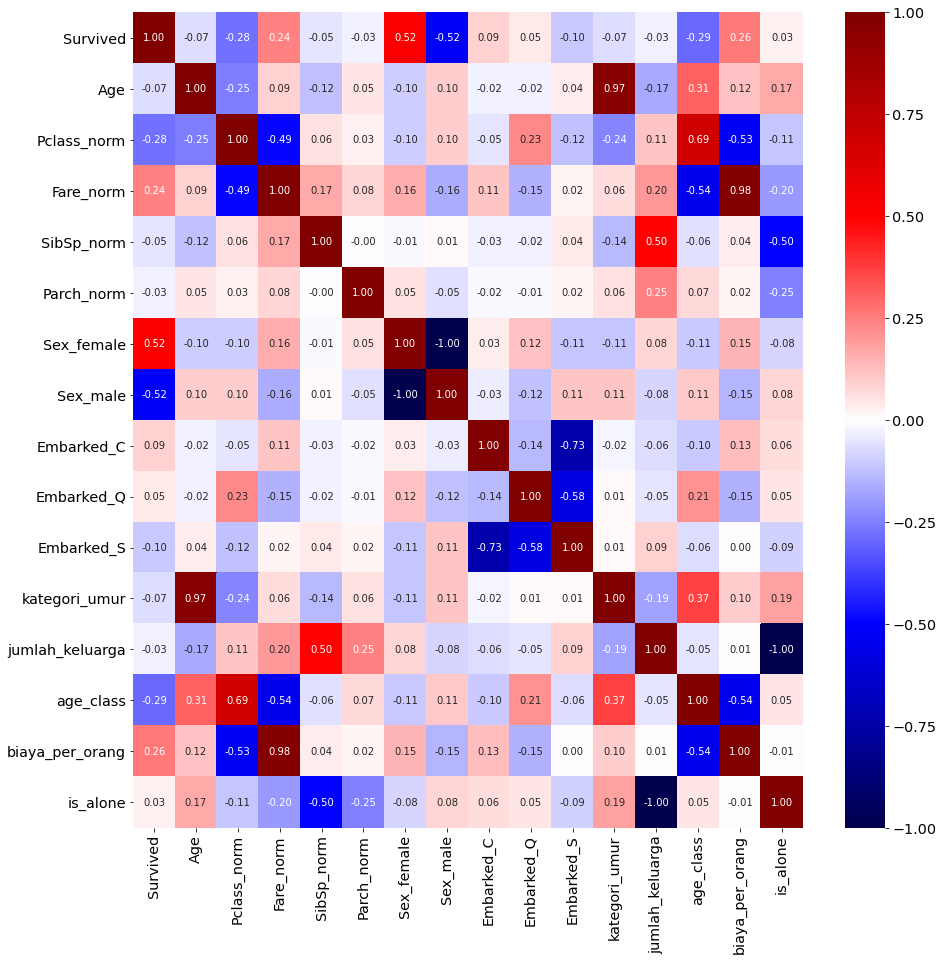

In [119]:
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr(), cmap='seismic', annot=True, fmt='.2f')
#terlihat pclass dengan fare multikolinearitas dan 
#masih banyak nilai korelasi yang kecil terhadap label sehingga perlu modifikasi variable lagi

In [120]:
data2.drop(['Age','Fare_norm'], axis=1, inplace=True)

In [121]:
#karena data imbalance 
data2['Survived_class'] = data2['Survived'] > 0.8
data2['Survived_class'].value_counts()

False    474
True     237
Name: Survived_class, dtype: int64

In [122]:
X = data2[[col for col in data2.columns if (str(data2[col].dtype) != 'object') and col not in ['Survived', 'Survived_class']]]
y = data2['Survived_class'].values
print(X.shape)
print(y.shape)

(711, 13)
(711,)


In [123]:
X

,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,1,0,0,0,1,0,0,1,3,1,3,0.114,1
2,1,0,0,1,0,0,0,1,4,1,4,0.125,1
3,0,0,0,1,0,0,0,1,6,1,0,0.838,1
4,1,0,0,0,1,0,0,1,6,1,6,0.127,1
5,1,0,0,0,1,0,1,0,5,1,5,0.133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,1,4,1,2,0.205,1
887,0,0,0,1,0,0,0,1,3,1,0,0.473,1
888,1,0,0,1,0,0,0,1,5,1,5,0.370,1
889,0,0,0,0,1,1,0,0,4,1,0,0.473,1


In [124]:
from imblearn.over_sampling import SMOTE
## undersampling agar ringan beban komputasinya
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


True     237
False    237
dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [126]:
from sklearn.svm import SVC #MODEL SVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
base_models = [("SVM",      SVC(kernel='linear')),                                                               #Support Vector Machines
               ("kNN",      KNeighborsClassifier(n_neighbors = 3)),                               #KNeighborsClassifier
               ("LR_model", LogisticRegression(random_state=95,n_jobs=-1)),                       #Logistic Regression model
               ("DT_model", DecisionTreeClassifier(random_state=95)),                             #Decision tree model
               ("RF_model", RandomForestClassifier(n_estimators=200 , oob_score = True, n_jobs = -1,
                                  random_state =95, max_features = "auto",
                                  max_leaf_nodes = 30)),                  #Random Forest model
               ("XGBoost", XGBClassifier(n_estimators=200)),                                                      #XGBoost model
               ("Bagging_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),        #Bagging model
                                                 max_samples=30,
                                                 n_estimators=500,
                                                 n_jobs=-1,
                                                 bootstrap=True,
                                                 oob_score=True)),
               ("Random_subspaces_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random subspaces model
                                                           n_estimators=100,
                                                           bootstrap=False,
                                                           max_samples=1.0,
                                                           max_features=True,
                                                           bootstrap_features=True,
                                                           n_jobs=-1)),
                ("Random_Patches_model", BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random Patches model
                                                            n_estimators=100,
                                                            bootstrap=True,
                                                            max_samples=1.0,
                                                            max_features=True,
                                                            bootstrap_features=True,
                                                            n_jobs=-1)),
                ("AdaBoost_model",AdaBoostClassifier(DecisionTreeClassifier(),                      #AdaBoost model
                                                    n_estimators=100,
                                                    learning_rate=0.01)),
                ("GradientBoosting",GradientBoostingClassifier(max_depth=2,                        #GradientBoosting model
                                                              n_estimators=100))]

In [127]:
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
kfolds = 10   # it is better to be 1/(size of testing test)
split = StratifiedKFold(n_splits=kfolds,
                        shuffle=True, 
                        random_state=42)  # use shuffle to ensure random distribution of data

# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'min_score':{},'max_score':{},'mean_score':{},'std_dev':{}}
for name, model in base_models:
    # get cross validation score for each model:
    cv_results = cross_val_score(model, 
                                 X_test, y_test, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    # output:
    #To find the average of all the accuracies.
    min_score = round(min(cv_results)*100, 4)
    models_data['min_score'][name] = min_score
     
    #To find the max accuracy of all the accuracies.
    max_score = round(max(cv_results)*100, 4)
    models_data['max_score'][name] = max_score
    
    #To find the min accuracy of all the accuracies.
    mean_score = round(np.mean(cv_results)*100, 4)
    models_data['mean_score'][name] = mean_score
    
    # let's find the standard deviation of the data to see degree of variance in the results obtained by our model.
    std_dev = round(np.std(cv_results), 4)
    models_data['std_dev'][name] = std_dev
    
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) ---> min: {min_score}, max: {max_score}")

SVM cross validation accuarcy score: 79.8095 +/- 0.0631 (std) ---> min: 71.4286, max: 92.8571
kNN cross validation accuarcy score: 74.0476 +/- 0.1203 (std) ---> min: 50.0, max: 86.6667
LR_model cross validation accuarcy score: 77.7143 +/- 0.0798 (std) ---> min: 64.2857, max: 92.8571
DT_model cross validation accuarcy score: 70.4762 +/- 0.0979 (std) ---> min: 50.0, max: 80.0
RF_model cross validation accuarcy score: 74.0476 +/- 0.092 (std) ---> min: 57.1429, max: 85.7143
XGBoost cross validation accuarcy score: 78.2857 +/- 0.1031 (std) ---> min: 64.2857, max: 92.8571
Bagging_model cross validation accuarcy score: 74.0952 +/- 0.0851 (std) ---> min: 57.1429, max: 85.7143
Random_subspaces_model cross validation accuarcy score: 69.1429 +/- 0.0595 (std) ---> min: 64.2857, max: 80.0
Random_Patches_model cross validation accuarcy score: 67.1429 +/- 0.0297 (std) ---> min: 64.2857, max: 71.4286
AdaBoost_model cross validation accuarcy score: 71.1905 +/- 0.1009 (std) ---> min: 50.0, max: 80.0
Gra

In [128]:
models_df = pd.DataFrame(models_data).sort_values(by='mean_score',ascending=False)
models_df

,min_score,max_score,mean_score,std_dev
SVM,71.429,92.857,79.809,0.063
XGBoost,64.286,92.857,78.286,0.103
LR_model,64.286,92.857,77.714,0.080
GradientBoosting,57.143,92.857,76.191,0.101
Bagging_model,57.143,85.714,74.095,0.085
kNN,50.000,86.667,74.048,0.120
RF_model,57.143,85.714,74.048,0.092
AdaBoost_model,50.000,80.000,71.191,0.101
DT_model,50.000,80.000,70.476,0.098
Random_subspaces_model,64.286,80.000,69.143,0.059


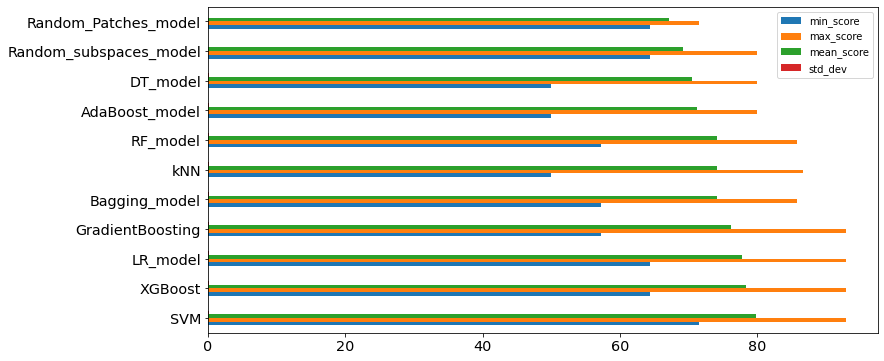

In [129]:
models_df.plot(kind='barh')


# TANPA MENGGUNAKAN CROSS VALIDATION

## Akurasi LogisticRegression

In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8111888111888111


## Akurasi RandomForestClassifier

In [131]:
#MODEL RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
rfc = print (metrics.accuracy_score(y_test, prediction_test))
rfc

0.8321678321678322


## Akurasi SVM

In [132]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8041958041958042

## Akurasi AdaBoostClassifier

In [133]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8111888111888111

## Akurasi XGBClassifier

In [134]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8531468531468531

## Deep Learning

In [135]:
#DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense
# define the keras sequential model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
# fit the keras model on the dataset
model.fit(X, y, epochs=200, batch_size=13)

Epoch 1/200
55/55 [==============================] - 1s 1ms/step - loss: 0.5723 - accuracy: 0.6962
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7553
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7722
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7890
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.8087
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8059
Epoch 7/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7918
Epoch 8/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8017
Epoch 9/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8073
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7989
Epoch 11/

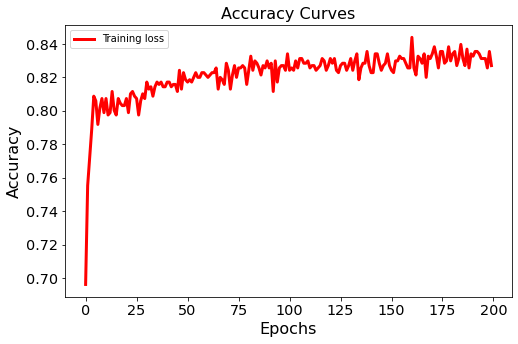

In [137]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

## Akurasi menggunakan Deep Learning

In [138]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') 

Accuracy: 82.52
